In [ ]:
! mkdir -p datasets
%cd datasets
! wget -nc https://raw.githubusercontent.com/pablonoya/zigzag-ml/master/datasets/housing.csv
%cd ..

# ¡Hola mundo! del machine learning
Considero que el [hola mundo](https://es.wikipedia.org/wiki/Hola_mundo) del machine learning es la [regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) un modelo matemático que busca aproximar la relación de una variable que depende de otras. Es una forma de saber cómo **las entradas influyen en la salida** 🤔.

El modelo resultante será la recta que mejor se ajuste a nuestros datos 📉.

## y = mx + b
Es la ecuación de la recta, describe la relacion entre un **término independiente** $x$ y uno **dependiente** $y$ que depende de $x$, el **parámetro** $m$ y el término independiente "$b$.  
Donde:

- $m$ es la **pendiente**, mide qué tan inclinada está la recta, un valor negativo muestra una recta que baja de izquierda a derecha.
- $b$ es el **término independiente**, es el punto en el que la recta corta el eje vertical de un plano.
- $y$ es la variable **dependiente** de los demás valores.
- $x$ es la variable **independiente**.

Si la ecuación fuera $y = -\frac{1}{2}x + 2$
La recta resultante sería:  
![recta resultante](img/2.1_line_equation.png)

Por tanto, $m = \frac{1}{2}$ y  $b = 2$

# Resolviendo el problema
Podemos resolver el primer problema ~~salvaje~~ que nos apareció, predecir el precio de una casa. Utilizaremos el dataset [California Housing](https://www.kaggle.com/camnugent/california-housing-prices), este dataset es el primer ejemplo del libro [Hands-on Machine Learning with Scikit-Learn and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) 🦎📖

In [2]:
# ¡venga, dataset!
import pandas as pd
data_housing = pd.read_csv('./datasets/housing.csv')
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Mirando el dataset
Antes de utilizar los datos deberíamos verificarlos un poco, por lo menos verificando que no existan datos vacíos.
Recordarás que podemos usar el método `isna`, pero nuestra tabla ahora es muy grande.

In [9]:
data_housing.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


Tenemos 20 mil filas 😨 revisarlas una a una para ver si tienen valores vacíos no es una opción, lo mejor sería contar qué valores son verdaderos, una tarea fácil si utilizamos una sumatoria pues Python convierte los valores True a 1 y False a 0, y podemos sumar por columna utilizando el método `sum` del DataFrame.

In [26]:
data_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Por ahora vamos a borrar cada fila que tenga un valor vacío usando `dropna`

In [27]:
data_housing.dropna(inplace=True)

Contamos con 10 columnas, cada fila describe las características promedio de un bloque de casas 🏡🏡🏡.  
Tomemos una columna como feature, la que mejor parece determinar el precio, dado por "median_house_value" es el ingreso en miles de sus habitantes, dado por "median_income". Cada columna retorna un objeto Series, y vamos a asignarlas en 2 variables.
> Features en `X`, y labels en `y`, así nombraremos las variables desde ahora.

In [29]:
# Seleccionando columnas tendremos objetos Series
X = data_housing['median_income']
y = data_housing['median_house_value']


Veamos cómo se relacionan ambas columnas gracias a una [gráfica de dispersion](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) realizada con [matplotlib](https://matplotlib.org/), una librería para graficar datos.

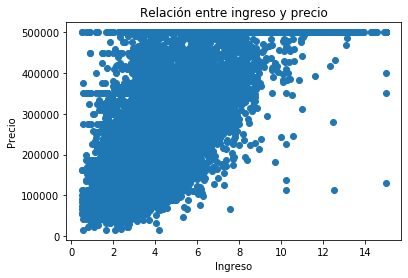

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("Ingreso")
plt.ylabel("Precio")
plt.title("Relación entre ingreso y precio")
plt.show()

En general, vemos una **relación directamente proporcional**: a mayor ingreso, mayor costo.  
También vemos muchos puntos en la parte superior, esto parece indicar que los precios mayores a 500 mil han sido truncados.

La **relación** entre el **parámetro y término independiente** de la recta y los atributos del objeto `model` es:
- $m$ es igual a `model.coef_[0]`
- $b$ es igual a `model.intercept_`

Debido a esto, cuando **entrenamos un modelo** de machine learning, en realidad, buscamos **hallar los parámetros que mejor se ajusten** a los datos.

In [34]:
from sklearn.linear_model import LinearRegression
# reshape a 2D considerando que trabajamos con un Series
X_2D = X.values.reshape(-1, 1)

# entrenamos el modelo para hallar los parámetros de la recta
model = LinearRegression()
model.fit(X_2D, y)

print(f"Los parámetros obtenidos son: m = {model.coef_[0] :.2f} y b = {model.intercept_ :.2f}")

Los parámetros obtenidos son: m = 41837.07 y b = 44906.37


La **pendiente es positiva**, esto confirma la relación **directamente proporcional** ↗.

# Utilizando el modelo
Con el modelo entrenado, podemos **estimar** o **predecir** el valor de todas las viviendas, sólo debemos llamar al método `predict`. Este usará internamente los parámetros `coef_` e `intercept` para la ecuación que ya conocemos 😎.

Para evaluar al modelo comparemos la primera predicción con el valor real de la primera vivienda. Los valores reales son los targets, recuerda que están en `y`.

In [32]:
predicted_values = model.predict(X_2D)

# comparemos con el valor real
print(f"El valor real es {y[0]}, y según el modelo es {predicted_values[0] :.2f}")

El valor real es 452600.0, y según el modelo es 393208.31


Hay una diferencia de -59 573 para esta vivienda, el modelo estima que el valor debe ser más bajo porque la recta está debajo del valor real y la diferencia será mayor mientras más lejos esté el valor real de la recta.

Vamos a **graficar la recta** que mejor se ajustó a los datos, tomaremos los valores máximo y mínimo de `X_2D`, para tener los límites de la gráfica.  
Entonces aplicamos la **predicción del modelo** para tener su respectivos valores en el eje y, entonces uniremos ambos puntos con un **gráfico de lineas** usando la función `plot` de matplotlib.

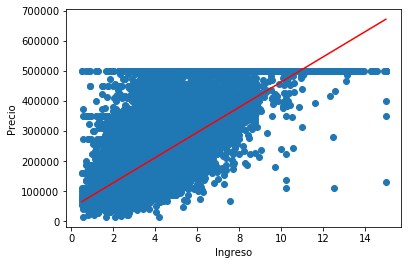

In [36]:
# la gráfica de los datos de fondo
plt.scatter(X, y)

xpoints = [min(X_2D), max(X_2D)]
ypoints = model.predict(xpoints)

plt.plot(xpoints, ypoints, color="red")
plt.xlabel("Ingreso")
plt.ylabel("Precio")
plt.show()

Considerando que los valores son altos, hasta 500 mil, no debemos preocuparnos mucho por un "pequeño" error de -59 mil.  
Pero esto sólo aplica a la primera vivienda, **¿cómo evaluamos el error de todas?**

# Evaluando el modelo
Podríamos promediar todos los errores, pero los que estén **debajo de la recta serán negativos**, como en la primera casa, para solucionarlo, **elevamos cada error al cuadrado** y luego promediamos estos.

$$\frac{1}{n} \sum{(y_{r} - \widehat{y} )^2}$$


$\widehat{y}$ se lee **y hat** (en español, *ye sombrero* 🤠) es el valor que predice el modelo, esto nos muestra que medimos la distancia vertical de cada punto a la recta para calcular el error. La recta que **mejor se ajusta** es aquella que **minimiza las distancias** hacia todos los puntos.

Esta fórmula es una **métrica** conocida como *mean squared error* (**MSE** para los amigos) o error cuadrático promedio.

In [35]:
y_hat = model.predict(X_2D)

squared_errors = (y_hat - y) ** 2
mse = sum(squared_errors) / len(y)

print(f"MSE: {mse :.2f}")

MSE: 7011035574.26


¡Es bastante alto! 😰

Si un error es alto, este valor al cuadrado es mucho más alto. Podemos observar **outliers** o valores extremos que se alejan bastante de la recta, si los sumamos... tendremos el porqué ese error tan alto.  
Es frecuente calcular el **square root of MSE (RMSE)** o raíz cuadrada del MSE para tener una mejor idea del error real, sin embargo este sigue siendo afectado por los outliers.

In [ ]:
rmse = mse ** (1/2)
print(f"RMSE: {rmse :.2f}")

Muchísimo mejor 😌

Además, existe una métrica a la que no le afectan demasiado los outliers, *mean absolute error* (**MAE**) o error absoluto promedio, es otra solución para los errores negativos, pues quizá hayas pensado también en el valor absoluto para solucionar el problema de obtener el promedio con números negativos.

Tanto MSE como MAE se pueden calcular con `sklearn.metrics`

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"MAE: {mean_absolute_error(y_hat, y) :.2f}")
print(f"MSE: {mean_squared_error(y_hat, y) :.2f}")

# Incluyendo más features
¿Recuerdas que sklearn espera un array 2D? cada feature que incluyamos es una columna más, con dos o más features:

- Entrenamos una regresión lineal **múltiple**, depende de muchas variables.
- El atributo `coef_` del modelo tendrá **múltiples features** (siempre las tuvo, pero sólo tomamos el primer valor).
- Es posible que **mejore el modelo**, si eliges **features que aporten información relevante** a la predicción.

Incluyamos la feature "housing_median_age" que describe la edad promedio de las casas, ambas features estarán en un DataFrame.

In [ ]:
# todas las filas, sexta y octava columna
X_selected_features = data_housing[['median_income', 'housing_median_age']]
X_selected_features.head()

In [ ]:
# entrenamos otro modelo
model_selected_features = LinearRegression()

# ¡ya no es necesario el reshape!
model_selected_features.fit(X_selected_features, y)

print("Coeficientes: ", model_selected_features.coef_)

# evaluemos
y_hat = model_selected_features.predict(X_selected_features)
print(f"MAE: {mean_absolute_error(y_hat, y) :.2f}")

¡Sí mejoró! 🥳

Intenta **cambiar o incluir más features**, pero no todas las combinaciones darán un mejor modelo, por razones que trataremos más adelante. Además no puedes usar (aún) la última columna "ocean_proximity" porque **no contiene valores númericos** .  
Tampoco podrás graficar en 2D si escoges 2 o más features, pero siempre podrás usar alguna métrica.

# Regresión lineal múltiple
Como mencionamos, el modelo ahora tiene ese nombre y permite aprender de múltiples _features_.

Un gran nombre conlleva una gran ecuación: 

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b $$

Donde:
+ $n$ es el **número** de features.
+ $a$ es un **vector de parámetros**.
+ $x$ es el **vector de features** para cada fila.
+ $b$ es el **término independiente**.

La cual es una **generalización** de la ecuación de la recta, conocida también como ecuación lineal.

# Ejercicios
Algunas combinaciones de features funcionarán mejor que otras, **prueba combinaciones de dos features**.  
¿Cuál parece funcionar mejor sobre la métrica MSE? ¿A qué crees que se deba?

In [39]:
# define variables para las columnas de features


**Entrena** un modelo con las mejores features que hallaste, y **utiliza** los atributos en `coef_` e `intercept` para **implementar** la ecuación de regresión lineal múltiple.  
Por último, **elige alguna fila** de los datos existentes para comparar el resultado con la respuesta real.

In [ ]:
# crea un nuevo modelo para esta tarea


# ¿Es un buen modelo?
Las métricas son útiles, pero pueden ser **engañosas**, debemos elegir siempre la que más se adecúe al problema, no la que presente un **error más bajo** (no hagas trampa 😡).  

Lo importante es que te hagas preguntas como ¿debería tomar en cuenta los **outliers**? o ¿necesito que mi modelo sea muy **preciso**?.  
La respuesta dependerá de los objetivos del modelo, y este **siempre dependerá de los datos** pues el modelo matemático será el mismo pero con **diferentes parámetros** como resultado de su entrenamiento 🧠.

Las **métricas suelen ser lo último** que extraemos de un proyecto de machine learning, antes deberíamos [probarlo](./3_test_set.ipynb).